# Basic theory of sealed and ported loudspeakers
Francis Deck, 1/8/2019

The MIT License (MIT) Copyright (c) 2018-2019 Francis Deck

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

This document is intended to show where the equations of basic speaker design come from. It offers little to no practical design advice, and may even fall into that great literary genre of “explanations of things for people who already understand them.”

## Why am I here?

If you want a useful design program, the most widely used is WinISD Pro:

http://www.linearteam.org

It's kind of old but a lot of people have used it. I always provide the disclaimer that I'm not a professional engineer. My equations have not been vetted by professional engineers, they may contain mistakes, and should not be trusted for design work. In addition, the Python code violates many rules of good software design, to make this readable and concise. Please verify your results using trusted tools!

## Contents
### Strategy

1. Figure out the driver by itself, without box or port

    * Simplistic voltage-current relationship
        * Ohm’s Law
        * Faraday’s Law (back EMF)
        
    * The forces on the cone
    
        * The driving force
        * Electrical damping (back EMF)
        * Mechanical damping
        * Mechanical resistance
        
    * The equation of motion
    
    * Solving the equation of motion
    
2. How the box works
3. Thiele-Small Parameters
4. How the port works
5. Coil inductance
6. System impedance
7. Putting it together: My modeling approach
8. Compute all of the useful graphs

    * SPL
    * Excursion
    * Port air speed
    * Impedance
    
### Physics Cheat Sheet
1. Ohm’s Law
2. Faraday’s Law
3. Magnetic Force Law
4. Hooke’s Law
5. Principle of “damping”
6. Newton’s Law
7. Acoustical Output

### Math & Engineering Cheat Sheet
1. Transformation from time space to frequency space
2. The business of “Q”

### Strategy

Before diving into the physics and math, I'm going to summarize my strategy for deriving the speaker resposne formulas.

1. **Figure out the driver by itself, without box or port**. The bare driver is the simplest way to understand the physical laws that govern speaker behavior. This behavior involves electricity, magnetism, and mechanics, all affecting the motion of the cone at the same time.

    * **Simplistic voltage-current relationship**. First of all, voltage and current are things that are easily measured in the lab. *Voltage* is what the amplifier puts out. It's fair to treat the amplifier as an ideal voltage source whose output voltage represents the signal that we want the speaker to reproduce. *Current* is important because an amplifier typically has a current limit, and because current generates the force that drives the cone in and out.
    
        * **Ohm’s Law** is the relationship bewteen voltage and current when the cone is sitting still. It can be generalized to include the resistance and inductance of the voice coil.
        
        * **Faraday’s Law** is the relationship between voltage and the motion of the coil in the magnetic field. Together they dictate the voltage-current relationship of the speaker.
        
    * **The forces on the cone**. I've turned all of the physical relationships into sources of force acting on the cone.
    
        * **The driving force, proportional to current**: Current flowing in the voice coil produces a force in the coil. This is probably the most familiar concept related to how speakers work.
        
        * **Electrical damping (back EMF), proportional to speed**: Faraday's Law leads to a velocity-dependent loss of energy.
        
        * **Mechanical damping, proportional to speed**: Flexing of the suspension material (spider and surround) causes heat to be transferred to those materials, resuting in a loss of energy from the moving system.
        
        * **Mechanical resistance, proportional to displacement**: Because the suspension is stretchy, it acts like a spring, pushing back against the excursion of the cone.
        
        * **Inertia, proportional to acceleration**: This can be thought as an additional force on the cone, that's proportional to its acceleration.
        
    * **The equation of motion**: Once I know all of the forces, I add them up and set the sum to zero. This is also a statement of Netwon's Third Law.
    
    * **Solving the equation of motion**: This is a differential equation, that is solved by a trick: Switching from the time domain to the complex frequency domain. As a result, the solution is a frequency response curve, which is typically what we're looking for anyway. We learn the **master equation of cone motion.** My approach is to treat everything else as a modification of this equation.

6. **System impedance**: Faraday's Law already gave us a relationship between voltage, current, and the motion of the driver. Now we have an equation of motion, so we can derive a pure relationship between voltage and current, the ratio of which is the system impedance.

7. **The business of Q**: While not strictly necessary to understand speakers, Q is how the speaker makers report the specs of a driver, so we have to undertand what Q is.

2. **How the box works**: We apply a simple relationship between the displacement of the cone, and the pressure in the box. If the area of the cone is known, then pressure can be turned into force.

3. **Thiele-Small Parameters**: At some point we'll want to start modeling real speakers, so we need to convert the typical published specs into our electromechanical parameters. We do that here.
4. **How the port works**: This is where we look into how the cone and port interact with one another through the pressure in the box. It's hairy.
5. **Coil inductance**: A minor, but necessary detail
7. **Putting it together: My modeling approach**: Here we see how I take my equation of cone motion and modify it to accommodate the box, ports, and coil impedance.
8. **Compute all of the useful graphs**: Finally we compute the performance of a system that I built several years ago.

    * SPL
    * Excursion
    * Port air speed
    * Impedance

## Physics Cheat Sheet

### Ohm’s Law

This is the familiar Ohm’s Law of electronics, $V = IR$, where:

$V$ = Voltage across the voice coil, in Volts

$I$ = Current through the voice coil, in Amperes

$R$ = Resistance of the voice coil, in Ohms

### Faraday’s Law

Michael Faraday discovered that a wire moving through a magnetic field would induce a voltage on the wire. The general math formula is more complicated, being written in differential, vector form. But in a speaker, the magnetic field, length of wire, and velocity of the cone, are all perpendicular to one another (how convenient), and we assume that $B$ is constant over the length of wire suspended in the magnetic gap. Specifically, the magnetic field points radially outward, and the coil is tangent to this field. In this case, the voltage (EMF) induced by the motion
of the cone is $V = BLv$, where:

$B$ = Magnetic field in Teslas

$L$ = Length of coil wire in meters

$v$ = velocity of coil in meters per second

The voltage induced in this way will later be referred to as the “back EMF” because it results in a force opposing the motion of the cone.

When Faraday’s Law and Ohm’s Law are combined, the voltages add up, as if they are in series:

$$V = IR + BLv$$

### Magnetic Force Law

Current flowing through a wire suspended in a magnetic field produces a force on the wire: 

$$F = BLI$$

$B$ = Magnetic field in Teslas

$L$ = Length of coil wire in meters

$I$ = Current flowing through coil

### Hooke’s Law

Hooke’s Law is an approximation for describing the behavior of a spring, or a material deflected by a force. It is written as $F = -Kx$, where:

$F$ = Force in Newtons

$K$ = Spring constant, or “mechanical resistance,” in Newtons per meter

$x$ = Excursion of voice coil in meters

The negative sign tells us that this is a restoring force, i.e., that if we push on the cone and let go, the cone will return to its rest position defined as $x = 0$. In a speaker, the spring constant is related to the springy-ness of the suspension (surround and spider).

### Principle of “damping”

Like Hooke’s Law, the concept of “damping” is an approximation. It describes effects that cause a system to lose energy, typically by converting it to heat. An example would be pushing your hand through water. The damping behavior is proportional to velocity, so a damping “law” is written as $F = -Cv$, where:

$F$ = Force in Newtons

$C$ = Damping constant in Newtons per meter per second

$v$ = Velocity in meters per second

In a speaker, mechanical damping is probably due to a small amount of heat generated by flexing the suspension material. Heat generation is important. A speaker is quite inefficient from a thermodynamic standpoint. You could think of a speaker as an electric heater that produces a bit of acoustical power.

### Newton’s Law

This is the familiar $F = ma$, where:

$F$ = the force on the cone, in Newtons

$m$ = The mass of the cone in kg

$a$ = The acceleration of the cone

### Acoustical Output

Here I call upon a couple of useful references:

http://www.acs.psu.edu/drussell/demos/baffledpiston/baffledpiston.html

http://www.ase.uc.edu/~pnagy/ClassNotes/AEEM728%20Introduction%20to%20Ultrasonics/part6.pdf

For the purposes of this document, I’m going to treat the speaker as an “ideal” piston, meaning that the entire cone moves in and out as a unit. Effects such as cone “breakup” and dust cap radiation are ignored. In practice, this will give us a theory that works for the bass to low midrange, i.e., up to around 250 Hz. This is also where box design matters. At higher frequencies, the published response graphs for the speaker are suitable for DIY analysis, and there are (hopefully) more sophisticated techniques based on empirical measurements for commercial design.

Equation 6.10 in the second reference gives the pressure density at the output of a cylindrical radiator of radius $r$:

$$p_0 = -i \omega \rho r^2 v$$

Here, $v$ is the familiar velocity of the cone, and is the density of air. But , the acceleration of the cone, so we can write:

$$p_0 = - \rho R^2 a$$


At a distance $R$, equation 6.1 of the second reference gives the pressure:

$$p = \frac {p_0} R = \dfrac {-\rho r^2 a} R$$

The next thing to know is a defined quantity, the reference value for 0 dB SPL is $p_{ref} = 20$ µPa RMS. We’ll use that when we draw SPL graphs using the formula:

$$SPL = 20 log_{10}\left (\dfrac p {p_{ref}} \right )$$

## Math & Engineering Crib Sheet
### Transformation from time space to frequency space
This is a topic that’s taught in college level engineering, and it represents a conceptual hurdle, even for the best of students. I won’t try to derive or prove it here. All I want to do is state some assumptions of this transformation, namely that the system is linear. So we’re giving up something by using this math trick – the ability to study nonlinear response – but it helps us derive a formula that’s useful. The transformation looks like this:

$$
\begin{matrix}x(t) \rightarrow x(\omega)
\\v(t) \rightarrow j\omega x(\omega)
\\a(t) \rightarrow -\omega^2 x(\omega)
\end{matrix}
$$

Here, $\omega$ is the “angular” frequency, equal to $2\pi f$, and $j = \sqrt{-1}$. This is where frequency enters our theory, allowing us to create frequency response graphs.

When we make this transformation, x becomes a complex number, i.e., having a real part and an imaginary part. The magnitude of $x(ω)$ is the amplitude of a sinusoidal function of frequency $ω$, and the ratio between the real and imaginary parts determines the phase. I’m not going to do anything with phase in this document.

### The business of “Q”

Since there’s no such thing as a perpetual motion machine, every oscillating system loses a bit of energy through each cycle. For instance in the speaker, the energy is mostly lost to heating the voice coil. Some is also “lost” to the acoustic wave, but since direct radiating speakers are so inefficient, we literally ignore the acoustical output when studying the mechanics of the speaker! The factor Q is the reciprocal of the fraction of energy lost per cycle.

I’ll refer to some useful articles

http://www.physics.ox.ac.uk/qubit/tutes/DampedHO.pdf

http://en.wikipedia.org/wiki/Q_factor

The useful thing to know is that Q is proportional to the imaginary term in the denominator of response functions:

$$F(\omega) \propto \frac 1 {\omega _0 ^2 + \dfrac {j \omega \omega_0} Q - \omega^2}$$
 
I will make only one use of this formula, which is to relate the Q’s of Thiele-Small theory to the electromechanical parameters of the speaker.

## Deriving the speaker response formula

My derivation is a re-vamping of the treatment in this excellent reference:

http://www.arcavia.com/kyle/Equations/index.html

A familiar technique in mechanics is to identify all of the forces on a body, add them up, and equate them to the product of mass and acceleration. Three primar

**Magnetic force**: Combining Ohm's and Faraday's laws:

$$V = IR + BLv$$

Solving (21) for $I$:

$$I = \dfrac {V - BLv} R$$

Notice that the second term has a negative sign, indicating a force that opposes the motion of the cone. The term $BLv$ is the *back EMF* of the voice coil. Recalling (2), the force on the coil is proportional to the current, and substituting per (22):

$$F_{mag} = BLI = \dfrac {BLV} R - \dfrac {BL^2 v} R$$

The second term has a negative sign, so it's an *opposing* force, and because it's proportional to velocity, it behaves just like a damping force. The effect of moving a conductor in a magnetic field is called *magnetic damping*.

**Spring force**: From Hooke's Law:

$$F_{spring} = -Kx$$

**Mechanical damping force**: From the damping formula:

$$F_{mech} - -Cv$$

**Summing the forces:**

$$F_{tot} = F_{mag} + F_{spring} + F_{mech}$$

$$F_{tot} = \dfrac {BLV} R - \dfrac {(BL)^2 v} R - Kx - Cv$$

$$F_{tot} = \dfrac {BLV} R - \left (\dfrac {(BL)^2} R + C \right ) v - Kx$$

**Applying Newton’s Law**:

$$F_{tot} = ma$$

We arrive at the equation governing the motion of the cone:

$$\dfrac {BLV} R - \left (\dfrac {(BL)^2} R + C \right ) v - Kx = ma$$

### Solving the equation of motion

First, apply the transformation to frequency space. Here goes:

$$\dfrac {BLV} R - j \omega x \left (\dfrac {(BL)^2} R + C \right ) - Kx = - \omega^2 x m$$

*Remember that this transformation is based on the assumption that the input singal and the motion of the cone, are both sinusoidal functions of time*. But thanks to this assumption, the resulting equation of motion is a simple linear equation in $x$.

$$x \left (K + j \omega \left (\dfrac {(BL)^2} R + C \right) - \omega^2 m \right ) = \dfrac {BLV} R$$

So now we can solve it:

<p><center>**This is the master equation of cone motion:**</center></p>

$$x(\omega) =  \dfrac {\left (\dfrac {BLV} {mR} \right )} {\left (\dfrac K m + j \omega \left (\dfrac {(BL)^2} {mR} + \dfrac C m \right) - \omega^2 \right )}$$

Before we leave this topic, let’s go one step further. As shown above, sound pressure is proportional to acceleration, or $\omega^2 x$. Writing this out:

$$\omega^2 x =  \dfrac {\omega^2 \left (\dfrac {BLV} {mR} \right )} {\left (\dfrac K m + j \omega \left (\dfrac {(BL)^2} {mR} + \dfrac C m \right) - \omega^2 \right )}$$

$$\omega^2 x =  \dfrac {\left (\dfrac {BLV} {mR} \right )} {\left (\dfrac K {m \omega^2} + \dfrac j \omega \left (\dfrac {(BL)^2} {mR} + \dfrac C m \right) - 1 \right )}$$

The denominator is a polynomial in $1/\omega$. Because of this, we can look at three distinct frequency “domains” where the three terms of the denominator are important:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Low frequency: $\omega^2 \rightarrow 0$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Demominator $\rightarrow \dfrac K {m \omega^2}$

At low frequencies, the dependence produces the well known 12 dB/octave rolloff of the driver, approaching zero acoustical output at DC.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Mid frequency: $\omega^2 \approx \dfrac K M$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Denominator: $\dfrac j \omega \left (\dfrac {(BL)^2} {mR} + \dfrac C M \right)$

The mechanical and magnetic damping factors determine the height and width of the resonant peak. The frequency where $\omega^2 = \dfrac K M$ is known as the *resonant frequency* $\omega_0 = \sqrt {K/M}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;High frequency: $\omega^2 \rightarrow \infty$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Denominator: $\dfrac {BLV} {mR}$

At frequencies well above resonance, the acoustical output is constant. In a real speaker, this corresponds to a region of relatively flat SPL response well into the lower midrange.

The fact that such a simple electromechanical device has flat frequency response over a reasonable range is the miracle that makes speakers useful when driven by a voltage source. Also, it is the balance between these three domains that is at play when tuning a box design for a particular driver.

## Impedance

The general (frequency dependent) version of Ohm’s Law is:

$$V = IZ$$

Thus Z can be defined as the voltage-current ratio:

$$Z = \frac V I$$

Going all the way back to the beginning, we have an equation containing voltage and current, but not their ratio:

$$I = \frac {V - BLv} {R}$$

However, we can work with that equation, because we now know that cone velocity v is proportional to the input voltage, and we have a formula for it. Making a small re-write:

$$I(\omega) = \frac {V - j \omega BL x} R = V \left (\frac {1 - \frac {j \omega BLx} V} R \right )$$

Thus:

$$Z = \frac R {1 - \frac {j \omega BLx} V}$$

Since x is proportional to V, we can use the value of x for a 1-Volt input to compute Z:

$$Z = \frac R {1 - j \omega BLx}\bigg|_{V=1}$$

When I'm modeling a speaker, I always compute $x$, so it's easy to compute $Z$ as well.

### Back to the Q's

Referring to the **master equation of cone motion** above, here's the denominator:

$${\dfrac K m + j \omega \left (\dfrac {(BL)^2} {mR} + \dfrac C m \right) - \omega^2}$$

This denominator looks like:

$$\omega_0^2 + j \omega \omega_0 \dfrac 1 Q + \omega^2$$

We can pull out the Q factor:

$$\dfrac 1 Q = \dfrac {(BL)^2} {KR} + \dfrac C K$$

Now it's clear that $1/Q$ contains two pieces. The right term is purely mechanical. It only depends on mechanical properties. The left term is *electromechanical* combining electrical and mechanical properties of the system. The sum of these terms is the *total Q* of the system.

### Can these parameters be measured?

Yes. I won't go into too much detail. We've got a bunch of parameters, and they're all mixed together. We don't want to use *acoustical* measurements, because that's too hard, and we don't have an anechoic chamber or calibrated microphone at our disposal. Everybody should have a good ohmmeter, so we can measure $R$ right away.

We can measure the resonant frequency by comparing the voltage and current in the speaker at different frequencies. For instance, if we put the speaker in series with a known resistor, then the voltage across the resistor is proportional to the current, and the voltage across the speaker is what it is. So now we know $K/m$.

Textbook methods now call for *changing* either $K$ or $m$ and seeing how the resonant frequency changes. You can change $K$ by putting the driver in a box of known volume (see how this affects the spring constant, below). Or you can change $m$, for instance by putting a blob of modeling clay on the cone. So now we know both $K$ and $m$. If you do *both* measurements, you can get the value for $S_d$, the effective frontal area of the speaker.

The damping constants are related to the *width* of the resonant peak, which can be measured. The problem with measuring the damping constants is that they are mixed together in every equation. However, you can change $R$ by putting an additional resistor in series with the speaker.

Now we know $R$, $K$, $m$, $BL$, and $C$, with $S_d$ thrown in for good measure. I'm not sure this is the best way of measuring these paramters, but the point to be made is that ***the electromechanical parameters of the speaker are all measurable by collecting impedance curves under different conditions***. This is why the engineers are so hung up on seeing impedance curves.

### My approach going further

**As a fair warning**: Going further the simplistic $K$ becomes a frequency dependent function $K(\omega)$, as we apply the box and the port. Thus the box and port change, not only the resonant frequency, but the overall resonant behavior of the system. For instance the box will tend to *increase* K, so it will *increase* Q. This is noticeable in systems that obtain a measurable resonant "hump" when stuffed into a smaller box. In practice, the designer has to start out with a speaker whose Q is lower than what will be needed from the built-up system.

This equation is for the "raw" driver, without box or port. Rather than going through the trouble of deriving new equations from scratch, I am going to treat the box and port as *modifications* of the raw driver. We'll see how this works.

## How the box works

Reference:

http://www.animations.physics.unsw.edu.au/jw/Adiabatic-expansion-compression.htm

The principle here is a squeeze box. You push on the cone, it compresses the air in the box, and the higher pressure in the box pushes back at you. The box makes it harder to push on the cone. It’s described as an “adiabatic” process, meaning that it happens quickly enough that the compression and expansion of the air don’t exchange heat with the
surroundings. Under this condition, a small change in the volume of air in the system (due to the cone moving in and out) is related to a change in pressure:

$$\dfrac {dP} {P_{atm}} = -\gamma \dfrac {dV} {V_{box}}$$

$dP$ = Change in pressure

$dV$ = Change in volume

$P_{atm}$ = Atmospheric pressure

$\gamma$ = Adiabatic constant, approximately 1.4 in air.

So the pressure change is equal to:

$$dP = - \dfrac {\gamma P_{atm} dV} {V_{box}}$$

The change in volume is proportional to the product of displacement $x$ and cone area $S_d$:

$$dP = - \dfrac {\gamma P_{atm} S_d x} {V_{box}}$$

Now the change in volume is the product of cone area and displacement x:

The change in pressure has a negative sign because positive x refers to outward motion of the cone. The force on the cone is the product of pressure change and cone area:

$$F_{box} = - \dfrac {\gamma P_{atm} S_d ^2} {V_{box}} x$$

This looks just like Hooke’s Law, if we let the box have an effective spring constant:

$$K_{box} = \dfrac {\gamma P_{atm} S_d ^2} {V_{box}}$$

So the box just acts as a spring! We can modify the response function for cone excursion, simply by adding to the mechanical spring constant of the driver:

<p><center>**The master equation of cone motion is the same, but with a new $K$:**</center></p>

$$x(\omega) =  \dfrac {\left (\dfrac {BLV} {mR} \right )} {\left (\dfrac {K_{total}} m + j \omega \left (\dfrac {BL^2} {mR} + \dfrac C m \right) - \omega^2 \right )}$$

where $K_{total} = K_{driver} + K_{box}$. Remember that the Q is changed too:

$$\dfrac 1 Q_{total} = \dfrac {(BL)^2} {K_{total}R} + \dfrac C K$$

Observation: Putting the speaker in a box raises the total spring constant, so it raises the resonant frequency of the system. It also narrows the width of the resonant peak.

## Effect of coil inductance

Coil inductance is handled by replacing the series resistance of the coil with a complex value:

$$R \rightarrow R + j \omega L$$

## Back to sound pressure for a moment

The sound pressure formula was:

$$p = \frac {p_0} R = \frac {-\rho r^2 a} R$$

Now we know what to do with the acceleration:

$$p = \frac {p_0} R = \frac {\rho r^2 \omega^2 x} R$$

## Thiele-Small Parameters

Finally, we’re in a position to talk about the mysterious Thiele-Small parameters. The point of ThieleSmall theory was to explain speakers to engineers who deeply understand electrical filters. My interest in the T-S parameters is to make use of published speaker data by converting them into the electromechanical parameters of my equation. **The Thiele-Small parameters, and the electromechanical parameters are just two different ways of expressing the same things.**

Returning to the derivation of the cone excursion function, $x(\omega)$ is a complex number, and its absolute value is equal to the amplitude of cone excursion. There is a frequency where the real part of the denominator goes to zero, referred to as the “resonant” frequency:

$$\omega_0 = \sqrt {\frac K m}$$

Converting this into a frequency gives us the "free air" resonance:

$$f_s = \frac {\omega_0} {2 \pi}$$

Continuing from the discussion of the box, we can also compute an effective resonant frequency for the box by itself if we know the mass of the cone:

$$\omega^2 _{box} = \frac {k_{box}} m =\frac {\gamma P_{atm} S_d^2} {m V_{box}}$$

Solving for $V_{box}$ gives us the box volume equivalent to the spring constant of the driver:

$$V_{as} = \frac {\gamma P_{atm} S_d^2} {m \omega_0^2}$$

We can recall the equation for cone excursion:

$$x(\omega) =  \frac {\left (\frac {BLV} {mR} \right )} {\left (\frac {K_{total}} m + j \omega \left (\frac {(BL)^2} {mR} + \frac C m \right) - \omega^2 \right )}$$

And compare it to the rule for Q:

$$F(\omega) \propto \frac 1 {\omega _0 ^2 + \frac {j \omega \omega_0} Q - \omega^2}$$

We can equate the imaginary terms in the denominator as follows:

$$\frac {j \omega \omega_0} Q = j \omega \left (\frac {(BL)^2} {mR} + \frac C m \right )$$

$$\frac 1 Q = \frac 1 {\omega_0} \left (\frac {(BL)^2} {mR} + \frac C m \right )$$

Now we can assign separate Q values to the electromagnetic and mechanical terms:

$$\frac 1 {Q_{tot}} = \frac 1 {Q_{es}} + \frac 1 {Q_{ms}}$$

where:

$$\frac 1 {Q_{es}} = \frac {BL^2} {\omega_0 mR}$$

$$\frac 1 {Q_{ms}} = \frac C {\omega_0 m}$$

Now we’re ready to unpack the Thiele-Small parameters. Here’s the program. First, I'm going to look up the datasheet for a speaker that I happen to own:

http://www.eminence.com/pdf/DeltaliteII_2512.pdf

This will give us a chance to see how to find the information we need in a reputable speaker datasheet. Do you mind if we switch to Python?

In [2]:
F_s = 37 # resonant frequency in Hz
R_e = 5.04 # series resistance of voice coil in Ohms
L_e = 0.46*0.001 # inductance of voice coil converted from mH to H
Q_ms = 3.13 # mechanical contribution to Q factor
Q_es = 0.44 # electromagnetic contribution to Q factor
Vas = 147*0.001 # equivalent box volume, liters converted to m^3
Xmax = 4.90*0.001 # maximum excursion, converted from mm to m
S_d = 519.5/1e4 # cone area converted from cm^2 to m^2

Now we'll turn them into the electromechanical parameters. Do you mind if we import some useful libraries?

In [3]:
from numpy import * # array math library
%matplotlib inline
from matplotlib.pyplot import *

gamma = 1.4 # adiabatic constant, dimensionless
P_atm = 101325 # atmospheric pressure, Pa
rho = 1.225 # density of air, kg/m^3
c = 345 # speed of sound in air

w_0 = 2*pi*F_s
print('resonant angular frequency w_0 (1/s) = ', w_0)
m = gamma*P_atm*S_d**2/w_0**2/Vas
print('cone mass m (kg) = ', m)
BL = sqrt(w_0*m*R_e/Q_es)
print('magnetic field length product BL (T m) = ', BL)
C = w_0*m/Q_ms
print('mechanical damping factor (N/(m/s)) = ', C)
K = w_0**2*m
print('mechanical spring constant (N/m)', K)
print('mechanical compliance (m/N)', 1/K)
r = sqrt(S_d/pi)
print('cone radius (m) =', r)

resonant angular frequency w_0 (1/s) =  232.4778563656447
cone mass m (kg) =  0.04818759285734274
magnetic field length product BL (T m) =  11.327846159124995
mechanical damping factor (N/(m/s)) =  3.5790889108292303
mechanical spring constant (N/m) 2604.3444125000005
mechanical compliance (m/N) 0.00038397379209920444
cone radius (m) = 0.12859315140102884


Now it's time to model the speaker. Here are the design conditions:

In [4]:
Znom = 8
Pin = 1
Vrms = sqrt(Pin*Znom)
print('input voltage amplitude (V RMS) =', Vrms)
V_box = 32*1e-3 # box volume, 32 l converted to m^3
# Additional parameters for when we get to the ported design
f_port = 40 # port tuning frequency in Hz
Q_port = 50
d_port = 100*0.01 # diameter of port in cm converted to m

input voltage amplitude (V RMS) = 2.8284271247461903


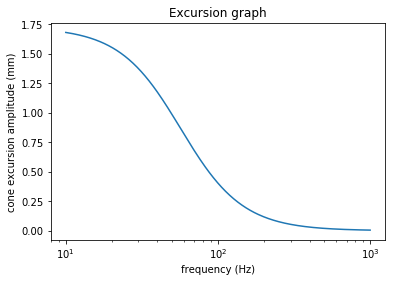

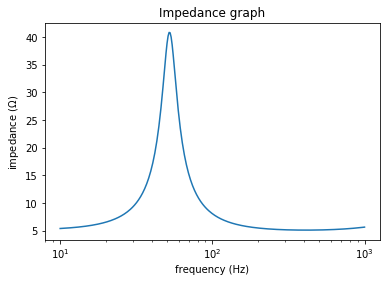

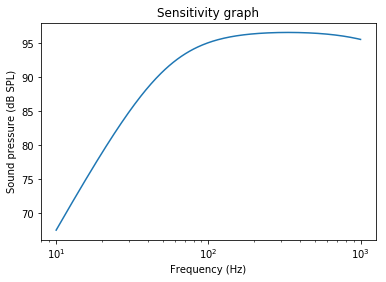

In [24]:
f = logspace(1, 3, 300) # a range of frequencies from 10 to 1000 Hz

# Angular frequency

w = 2*pi*f

# Combined voice coil resistance and inductance

z = R_e + 1j*w*L_e

# Excursion, complex valued, anticipating box spring constant

def plots(K_box, ported = False):
    
    # Corrections for port... we'll learn how this works below
    
    if ported:
        w_port = 2*pi*f_port
        print('Port angular frequency (1/s)', w_port)
        Q_port = 50
        kappa = w**2/(w**2 - 1j*w*w_port/Q_port - w_port**2)
    else:
        kappa = 1

    Keff = K + kappa*K_box
    x = BL*Vrms/m/z/(Keff/m + 1j*w*(BL**2/m/z + C/m) - w**2)
    semilogx(f, abs(x)*1000*1.414)
    title('Excursion graph')
    xlabel('frequency (Hz)')
    ylabel('cone excursion amplitude (mm)')
    show()

    # Impedance, complex valued

    Z = z/(1 - 1j*w*BL*x/Vrms)

    semilogx(f, abs(Z))
    title('Impedance graph')
    xlabel('frequency (Hz)')
    ylabel('impedance ($\Omega$)')
    show()

    # Listening distance, 1 meter

    R = 1

    # Sound pressure at listening distance

    p = rho*r**2*w**2*kappa*x/R/2
    p_ref = 20e-6 # reference pressure in Pa RMS

    # Sound pressure level in dB SPL

    spl = 20*log10(abs(p)/p_ref)

    semilogx(f, spl)
    title('Sensitivity graph')
    xlabel('Frequency (Hz)')
    ylabel('Sound pressure (dB SPL)')
    show()
    
    # More ported behavior
    
    if ported:
        kappa2 = w_port**2/(w**2 - 1j*w*w_port/Q_port - w_port**2)
        Keff = K + kappa*K_box
        S_port = pi*d_port/4
        x = BL*Vrms/m/z/(Keff/m + 1j*w*(BL**2/m/z + C/m) - w**2)
        v_port = 1j*w* kappa2*x*S_d/S_port
        semilogx(f, abs(v_port)*1000*1.414/c)
        xlabel('frequency (Hz)')
        ylabel('port air speed (mach)')
        show()
    
plots(K)

## Okay, now let's put it in a box

Recalling the formula for the spring constant added by the box:

$$K_{box} = \frac {\gamma P_{atm} S_d ^2} {V_{box}}$$

Let's try a box of 32 liters, and see how it affects the performance of the speaker.

box spring constant (N/m) 11963.707144921877


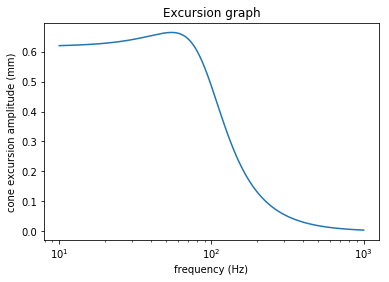

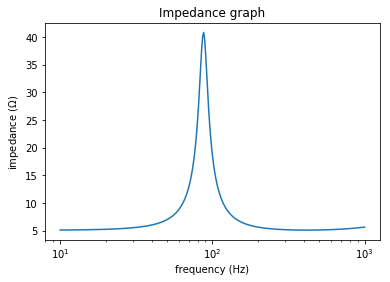

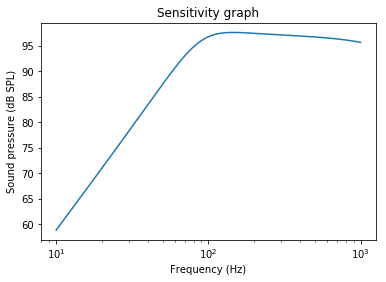

In [23]:
K_box = gamma*P_atm*S_d**2/V_box
print('box spring constant (N/m)', K_box)
plots(K_box)

## How the port works

Introducing the symbols:

$S_d$ = Frontal area of cone

$S_{port}$ = Frontal area of port

$x$ = Displacement of the cone

$x_{port}$ = Displacement of the "slug" of air inside the port

$m_{port}$ = Mass of air "slug" inside the port

We're going to start with the effect of the cone and port on the volume of the box. The total change of volume is the sum of the volumes displaced by the cone and the port:

$$dV = S_{port} x_{port} + S_d x$$

Change in pressure as discussed in section on box behavior

$$dP = -\dfrac {\gamma P_{atm}(S_{port} x_{port} + S_d x)} {v_{box}}$$

Using the equation for the spring constant of the cone as a template, we can define independent spring constants for the cone and for the port:

$$K_{box} = \dfrac {\gamma P_{atm} S_d^2} {V_{box}}$$

<center>$K_{port} = \dfrac {\gamma P_{atm} S_{port}^2} {V_{box}}$ (equation 1)</center>

Likewise, I'll define a resonant frequency for the port:

$$\omega_{port} = \sqrt {\dfrac {K_{port}} {M_{port}}}$$

Now we can re-write $dP$:

$$dP = -(\dfrac {K_{port} x_{port}} {S_{port}} + \dfrac {K_{box} x} {S_d})$$

Just as in the case of the sealed box, air pressure on the cone produces a force. We'll write it, then rearrange it into convenient terms: 

$$F_{cone} = -\dfrac {\gamma P_{atm} S_d S_{port} x_{port}} {V_{box}} -\dfrac {P_{atm} S_d^2 x} {V_{box}}$$

$$F_{cone} = -\dfrac {K_{box} S_{port} x_{port}} {S_d} - K_{box} x$$

There is also a force on the port:

$$F_{port} = \omega^2 x_{port} m_{port} + S_{port} dP$$

$$F_{port} = \dfrac {\omega^2 x_{port} K_{port}} {\omega_{port}^2} + S_{port}dP$$

$$F_{port} = \dfrac {\omega^2 x_{port} K_{port}} {\omega_{port}^2} - S_{port}(\dfrac {K_{port} x_{port}} {S_{port}} + \dfrac {K_{box} x} {S_d})$$

Many substitutions later, and setting the total force (inertia plus pressure driven) to zero:

<center>$F_{port} = \dfrac {K_{box} S_{port}^2 \omega^2 x_{port}} {S_d^2 \omega_{port}^2} - \dfrac {K_{box} S_{port}^2 x_{port}} {S_d^2} - \dfrac {K_{box} S_{port} x} {S_d} = 0$ (equation 2)</center>

Notice that I labeled equations 1 and 2 above. This is a pair of equations that can be solved for $x$ and $x_{port}$. I cheated and used an automatic equation solver to do this.

$$x = \dfrac {(\omega_{port}^2 - \omega^2)F_{cone}} {K_{box} \omega^2}$$

$$x_{port} = -\dfrac {S_d \omega_{port}^2 F_{cone}} {K_{box} S_{port} \omega^2}$$

Look at this. When $\omega = \omega_{port}$,$x$ drops to zero. This is the classic behavior of a ported speaker: At the port resonance, the port is doing everything and the cone is doing nothing but transferring force from the amplifier to the port.

Next we'll rearrange the solution for $x$ to write $F_{cone}$ as a function of $x$. Now we've got a force proportional to $x$, which can be turned into a force law with spring constant $K_{eff}$:

$$F_{cone} = \dfrac {K_{box} \omega^2 x} {\omega_{port}^2 - \omega^2}$$

$$K_{eff} = \dfrac {F_{cone}} x = -\dfrac {K_{box} \omega^2} {\omega_{port}^2 - \omega^2}$$

This equation shows an obvious factor that completely describes the efffect of the port, which I call the "port correct factor" $\kappa$:

$$\kappa = \dfrac {\omega^2} {\omega^2 - \omega_{port}^2}$$

To "use" the port, simply multiply K by the port correction factor which imposes a frequency dependent spring constant on the box.

What happens to $\kappa$ when $\omega = \omega_{port}$? At the port tuning frequency, $K$ goes to infinity, i.e., the box becomes infinitely stiff, and the cone stops moving. Also, a program using this formula will produce a divide-by-zero error. In reality, the port probably dissipates some heat, so we can give it a Q factor, which also eliminates the program error, for instance:

$$\kappa = \dfrac {\omega^2} {\omega^2 + \dfrac {j \omega \omega_{port}} {Q_{port}} - \omega_{port}^2}$$

Assigning an arbitrarily high value to , such as 50, prevents the modeling program from crashing, and is probably realistic.

Now, looking ahead, the sound produced by the system will be based on the total volume displaced by both the cone and the port. So we find out how much that is.

$$\dfrac {x_{port}} x = -\dfrac {S_d \omega_{port}^2} {S_{port}(\omega_{port}^2 - \omega^2)}$$

The total displacement of air is the sum of the cone and port:

$$S_{port} x_{port} + S_d x = S_d x - \dfrac {S_d \omega_{port}^2 x} {(\omega_{port}^2 - \omega^2)}$$

$$ = -\dfrac {S_d \omega^2 x} {(\omega_{port}^2 - \omega^2)} =  \kappa S_d x$$

To get the total air displacement, we correct displacement of the cone by the same factor that we use to correct the spring constant.

## Port air speed

Going back to the relationship between the two port displacements, the speed is simply $j\omega$ times the displacement:

$$j \omega x_{port} = \frac {S_d \omega_{port}^2 x} {S_{port}(\omega^2 + \frac {j \omega \omega_{port}} {Q_{port}} - \omega_{port}^2)}$$

Port angular frequency (1/s) 251.32741228718345


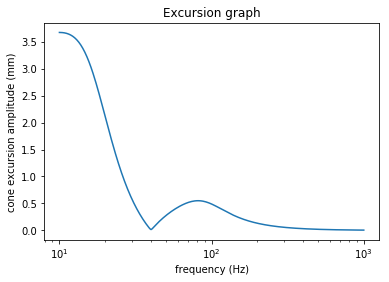

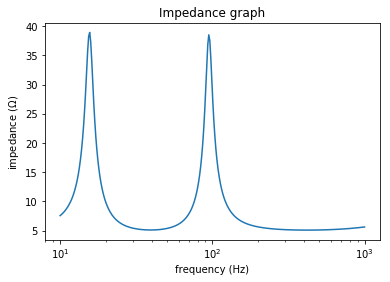

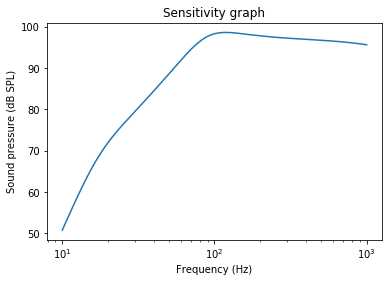

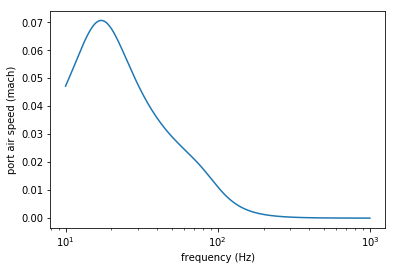

In [22]:
plots(K_box, ported = True)

## Comparison to WinISD

Because WinISD is the gold standard in the DIY world, and is freely available, I decided to compare the results of my program to its graphs. I've found that I can reconcile my graphs with WinISD if I make an allowance for how our respective programs compute the voltage at the terminal of the speaker. According to the help file in WinISD:

*Cone excursion shows how much driver cone moves with sinusoidal excitation at chosen powerlevel. The powerlevel is controlled in "plot"-tab. The power applied can be related to excitation voltage with following relation: Eg=sqrt(P·Re), or P=Eg²/Re where Eg is the RMS voltage applied to driver's terminals, P is the input power in watts and Re is the DC resistance of the voice coil.*

So WinISD computes power according to:

$$P = \dfrac {V_{rms}^2} {R_e}$$

In contrast, I compute voltage according to:

$$P = \dfrac {V_{rms}^2} {Z_{nom}}$$

I think that "my" method is actually more common in the industry. For instance, Eminence datasheets cite 2.83 V RMS as the test voltage for their sensitivity graphs. This isn't a criticism of WinISD, but is just a matter of trying to understand the nuts and bolts.

To make a precise comparison, you have to make sure that both programs are using the same driver model. The datasheet parameters for some speakers have changed over the years. For instance my programs all use the datasheet that was published when I bought my 2512-ii driver, but WinISD uses updated values. So I had to make sure that the same values were typed into both programs.

Let's take my favorite Eminence speaker, where $Z_{nom}$ = 8 $\Omega$ and $R_e$ = 5 $\Omega$. In my program, 1 Watt translates into $\sqrt 8$ = 2.83 V RMS, and in WinISD, $\sqrt 5$ = 2.24 V RMS. Under these conditions, my program would report a cone displacement 26% higher than WinISD, and 2 dB higher SPL. This is borne out in the graphs. Here's WinISD for SPL at 1 W:

![alt text](winisd_spl.jpg "Title")

And here's my program (online Javascript version):

![alt text](fjd_spl.jpg "Title")

Likewise, here's WinISD for excursion at 250 W:

![alt text](winisd_x.jpg "Title")

And here's my program:

![alt text](fjd_x.jpg "Title")

These graphs confirm that my program comes out about 2 dB and 26% higher for SPL and excursion. There's a bit of a difference in the excursion graph near the port resonance, which I think is due to modeling a Q factor for the port. My computations above use the port Q factor, but the Javascript version doesn't. 

## More References
Background reading that I found to be useful

http://www.arcavia.com/kyle/Equations/index.html

http://www.silcom.com/~aludwig/

http://www.diysubwoofers.org/

Information that I pulled into this report

http://hyperphysics.phy-astr.gsu.edu/hbase/oscda.html

http://www.physics.ox.ac.uk/qubit/tutes/DampedHO.pdf

http://www.animations.physics.unsw.edu.au/jw/Adiabatic-expansion-compression.htm

Appendix 1: wxMaxima code for solving x, xport:

    dp: -(kport*xport/sport + kbox*x/sd);
    eq1: fcone = -kbox*sport*xport/sd - kbox*
    eq2: kbox*sport**2*w**2*xport/sd**2/wport**2
        - kbox*sport**2*xport/sd**2
        - kbox*sport*x/sd = 0;
    solve([eq1, eq2], [x, xport])[1];